In [ ]:
# !nvidia-smi

In [ ]:
import numpy as np
import os
import sys
import cv2
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D,BatchNormalization, Lambda

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(tf. __version__)

2.8.0


In [ ]:
IMAGE_SIZE = [299, 299]

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
  layer.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
x = Flatten()(inception.output)
x1 = Dense(256, activation='relu')(x)
x2 = Dense(128, activation='relu')(x1)
x3 = Dense(64, activation='relu')(x2)
prediction = Dense(2, activation='sigmoid')(x3)

model = Model(inputs=inception.input, outputs=prediction)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
datagen = ImageDataGenerator(rescale= 1./255,
                            rotation_range=45,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            validation_split = 0.25)

In [ ]:
training_set = datagen.flow_from_directory('/content/drive/My Drive/Pan_Pata/Train_S',
                                     target_size = (299,299),
                                     class_mode = 'categorical',
                                     subset='training')

test_set  = datagen.flow_from_directory('/content/drive/My Drive/Pan_Pata/Train_S', 
                                      target_size = (299,299),
                                      class_mode = 'categorical',
                                      subset='validation')

Found 3851 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
       training_set,
       validation_data=test_set,
       epochs=20,
       steps_per_epoch=len(training_set),
       validation_steps=len(test_set),
       callbacks = [early_stop])
model.save('Model_model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
121/121 [==============================] - 933s 7s/step - loss: 1.4346 - accuracy: 0.7777 - val_loss: 1.7487 - val_accuracy: 0.7210
Epoch 2/20
121/121 [==============================] - 597s 5s/step - loss: 0.5892 - accuracy: 0.8429 - val_loss: 0.4111 - val_accuracy: 0.8566
Epoch 3/20
121/121 [==============================] - 605s 5s/step - loss: 0.3380 - accuracy: 0.8829 - val_loss: 0.3358 - val_accuracy: 0.8652
Epoch 4/20
121/121 [==============================] - 605s 5s/step - loss: 0.3157 - accuracy: 0.8857 - val_loss: 0.3144 - val_accuracy: 0.8636
Epoch 5/20
121/121 [==============================] - 606s 5s/step - loss: 0.2434 - accuracy: 0.9060 - val_loss: 0.2772 - val_accuracy: 0.8940
Epoch 6/20
121/121 [==============================] - 603s 5s/step - loss: 0.2109 - accuracy: 0.9198 - val_loss: 0.2643 - val_accuracy: 0.8870
Epoch 7/20
121/121 [==============================] - 603s 5s/step - loss: 0.2063 - accuracy: 0.9242 - val_loss: 0.2897 - val_accuracy: 0.8862

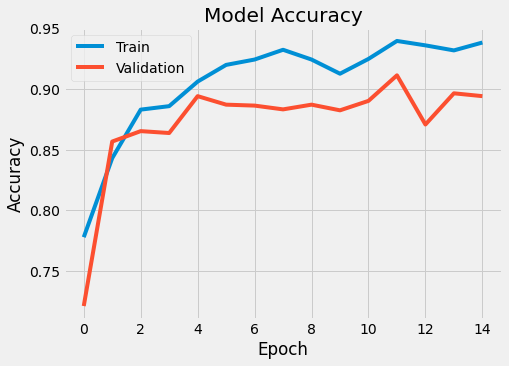

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

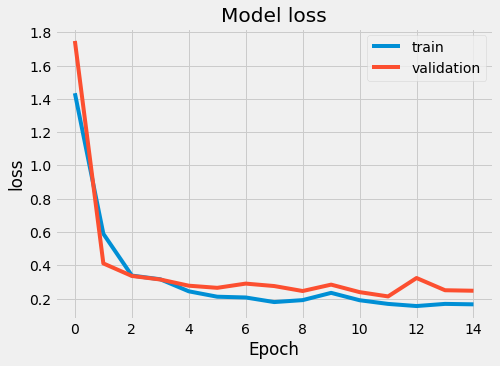

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

In [ ]:
testt_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
testt_generator = testt_datagen.flow_from_directory( '/content/drive/My Drive/Pan_Pata/Test',
                                              target_size = (299,299),
                                              class_mode='categorical',
                                              shuffle=False)

Found 658 images belonging to 2 classes.


In [ ]:
score = model.evaluate_generator(testt_generator, 658)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy = ",score)

Accuracy =  [0.1232990026473999, 0.9483282566070557]


In [ ]:
pred = model.predict_generator(testt_generator, 658)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_true=testt_generator.classes

In [ ]:
y_pred_inceptionV3=np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0(Bacterial)', 'class 1(Steam)']
print(classification_report(y_true, y_pred_inceptionV3, target_names=target_names))

                    precision    recall  f1-score   support

class 0(Bacterial)       0.94      0.96      0.95       329
    class 1(Steam)       0.96      0.93      0.95       329

          accuracy                           0.95       658
         macro avg       0.95      0.95      0.95       658
      weighted avg       0.95      0.95      0.95       658



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred_inceptionV3))

[[317  12]
 [ 22 307]]


In [ ]:
y_pred_cnn = model.predict(testt_generator).ravel()

In [ ]:
from sklearn.metrics import roc_curve, auc

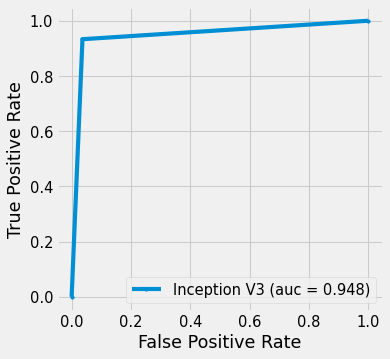

In [ ]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_true, y_pred_inceptionV3)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=75)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Inception V3 (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()